In [2]:
import os #for operation on single file
import random #for generating random numbers
import shutil # for operation on collection of files
import numpy as np
from shutil import copyfile
from PIL import Image #to import the images
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math
from keras.utils.np_utils import to_categorical  #for coverting into one hot encoding
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
#from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for augemtation of images like left rotate, right rotate
 
  


In [3]:
test_dir = '/content/drive/MyDrive/DATASET_101/Test'
train_dir = '/content/drive/MyDrive/DATASET_101/Train'

In [4]:
batch_size =128
img_height, img_width = 224,224

In [5]:
input_shape = (img_height, img_width, 3)

In [6]:
random_seed = np.random.seed(1142)  #to generate random number

train_datagen = ImageDataGenerator(
    rescale =1. /225,
    validation_split = 0.20,  #validation dataset 20% of data
    zoom_range = 0.2,
    shear_range = 0.2,
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (img_height, img_width),
    batch_size = batch_size,
    seed = random_seed,
    shuffle= True,
    subset ='training',
    class_mode = 'categorical'
)

Found 1144 images belonging to 5 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (img_height, img_width),
    batch_size = batch_size,
    seed = random_seed,
    shuffle= False,
    subset ='validation',
    class_mode = 'categorical'
)

Found 285 images belonging to 5 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1. /255 )
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size= (img_height, img_width),
    batch_size = batch_size,
    seed = random_seed,
    shuffle= False,
    class_mode = 'categorical'
)

Found 395 images belonging to 5 classes.


In [10]:
nb_train_samples =len(train_generator.filenames) #number of train samples
nb_validation_samples =len(validation_generator.filenames)
nb_test_samples =len(test_generator.filenames)

In [11]:
num_classes = len(train_generator.class_indices)

In [12]:
print("nb_train_samples:",nb_train_samples)
print("nb_validation_samples:",nb_validation_samples)
print("nb_test_samples:",nb_test_samples)
print("\n num_classes:",num_classes)

nb_train_samples: 1144
nb_validation_samples: 285
nb_test_samples: 395

 num_classes: 5


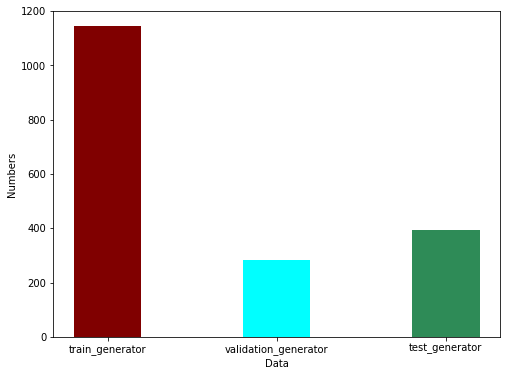

In [13]:
plt.figure(figsize=(8,6))
plt.bar(["train_generator", "validation_generator", "test_generator"], [nb_train_samples, nb_validation_samples, nb_test_samples], color=["maroon", "cyan","seagreen"], width=0.4 )
plt.xlabel('Data')
plt.ylabel('Numbers')
plt.show()

**CNN IMPLIMENTATION**

In [14]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size = (3,3), padding='Same', activation ='relu', input_shape=(img_height, img_width, 3) ))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, kernel_size = (3,3), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

    





model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

In [15]:
batch_size= 100
epochs=120
learn_rate=.001
#gd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


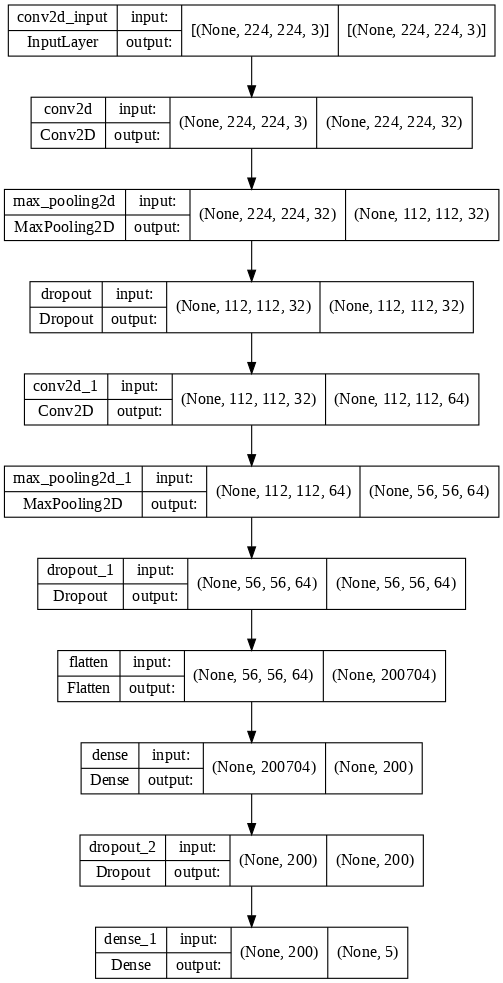

In [16]:
from tensorflow.keras.utils import plot_model
plot_model (model, show_shapes= True, expand_nested = True, dpi = 80 )

In [ ]:
re = model.fit_generator(train_generator, epochs = 120, verbose =1, validation_data= validation_generator )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/120
9/9 [==============================] - 374s 41s/step - loss: 4.1102 - accuracy: 0.5288 - val_loss: 0.8322 - val_accuracy: 0.7439
Epoch 2/120
9/9 [==============================] - 81s 9s/step - loss: 0.6520 - accuracy: 0.7771 - val_loss: 0.6197 - val_accuracy: 0.7544
Epoch 3/120
9/9 [==============================] - 80s 9s/step - loss: 0.5125 - accuracy: 0.7867 - val_loss: 0.6023 - val_accuracy: 0.7474
Epoch 4/120
9/9 [==============================] - 80s 9s/step - loss: 0.4602 - accuracy: 0.8129 - val_loss: 0.4995 - val_accuracy: 0.7579
Epoch 5/120
9/9 [==============================] - 81s 9s/step - loss: 0.4483 - accuracy: 0.8103 - val_loss: 0.5826 - val_accuracy: 0.7474
Epoch 6/120
9/9 [==============================] - 79s 9s/step - loss: 0.4568 - accuracy: 0.8086 - val_loss: 0.5057 - val_accuracy: 0.7789
Epoch 7/120
9/9 [==============================] - 81s 9s/step - loss: 0.4263 - accuracy: 0.8226 - val_loss: 0.5018 - val_accuracy: 0.7649
Epoch 8/120
9/9 [========

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-ticks")
plt.plot(re.history['accuracy'])
plt.plot(re.history['val_accuracy'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training acc', 'test acc'], loc='upper left')
plt.show()


#summmerize history for loss
plt.plot(re.history['loss'])
plt.plot(re.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()


plt.figure()

In [ ]:
file = model.save('Avi_model.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

print("==============TEST RESULTS============")
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False) 
test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]

predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
confusion_mtx = confusion_matrix(true_classes, yPredictions) 
y_pred_probabilities=yPredictions
classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

target_names = classnames
print(classification_report(true_classes, yPredictions, target_names=target_names))

#print('roc_auc_score = ' + str(roc_auc_score( true_classes, yPredictions)))


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]


y_pred=yPredictions
y_pred_probabilities=y_pred

# y_pred = np.argmax(y_pred,axis = 1) 
y_actual = y_true

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

In [ ]:
print('roc_auc_score = ' + str(roc_auc_score(y_pred, y_true)))